In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import random

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
pd.set_option('display.max_columns',None)


#**IMPORT**

Mobile_train

In [ ]:
url = 'https://drive.google.com/file/d/1K57W4NjHHpto59YYFskyLqsK56cZBjgx/view?usp=sharing'
url ='https://drive.google.com/uc?id=' +url.split('/')[-2]
df_train = pd.read_csv(url)

In [ ]:
df_train

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1,0


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [ ]:
df_train.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [ ]:
df_train.shape

(2000, 21)

In [ ]:
df_train.nunique()

battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1137
px_width         1109
ram              1562
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

In [ ]:
list (df_train.columns)

['battery_power',
 'blue',
 'clock_speed',
 'dual_sim',
 'fc',
 'four_g',
 'int_memory',
 'm_dep',
 'mobile_wt',
 'n_cores',
 'pc',
 'px_height',
 'px_width',
 'ram',
 'sc_h',
 'sc_w',
 'talk_time',
 'three_g',
 'touch_screen',
 'wifi',
 'price_range']

#**Checking Missing / Duplicate**

In [ ]:
df_train.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [ ]:
df_train.duplicated().sum()

0

#**Correlation**

In [ ]:
df_train.corr()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.011252,0.011482,-0.041847,0.033334,0.015665,-0.004004,0.034085,0.001844,-0.029727,0.031441,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.011522,-0.010516,-0.008343,0.200723
blue,0.011252,1.000000,0.021419,0.035198,0.003593,0.013443,0.041177,0.004049,-0.008605,0.036161,-0.009952,-0.006872,-0.041533,0.026351,-0.002952,0.000613,0.013934,-0.030236,0.010061,-0.021863,0.020573
clock_speed,0.011482,0.021419,1.000000,-0.001315,-0.000434,-0.043073,0.006545,-0.014364,0.012350,-0.005724,-0.005245,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.046433,0.019756,-0.024471,-0.006606
dual_sim,-0.041847,0.035198,-0.001315,1.000000,-0.029123,0.003187,-0.015679,-0.022142,-0.008979,-0.024658,-0.017143,-0.020875,0.014291,0.041072,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.022740,0.017444
fc,0.033334,0.003593,-0.000434,-0.029123,1.000000,-0.016560,-0.029133,-0.001791,0.023618,-0.013356,0.644595,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.001793,-0.014828,0.020085,0.021998
four_g,0.015665,0.013443,-0.043073,0.003187,-0.016560,1.000000,0.008690,-0.001823,-0.016537,-0.029706,-0.005598,-0.019236,0.007448,0.007313,0.027166,0.037005,-0.046628,0.584246,0.016758,-0.017620,0.014772
int_memory,-0.004004,0.041177,0.006545,-0.015679,-0.029133,0.008690,1.000000,0.006886,-0.034214,-0.028310,-0.033273,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790,-0.009366,-0.026999,0.006993,0.044435
m_dep,0.034085,0.004049,-0.014364,-0.022142,-0.001791,-0.001823,0.006886,1.000000,0.021756,-0.003504,0.026282,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003,-0.012065,-0.002638,-0.028353,0.000853
mobile_wt,0.001844,-0.008605,0.012350,-0.008979,0.023618,-0.016537,-0.034214,0.021756,1.000000,-0.018989,0.018844,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209,0.001551,-0.014368,-0.000409,-0.030302
n_cores,-0.029727,0.036161,-0.005724,-0.024658,-0.013356,-0.029706,-0.028310,-0.003504,-0.018989,1.000000,-0.001193,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148,-0.014733,0.023774,-0.009964,0.004399


In [ ]:
df_train.columns = df_train.columns.str.upper()
# df_test.columns = df_test.columns.str.upper()

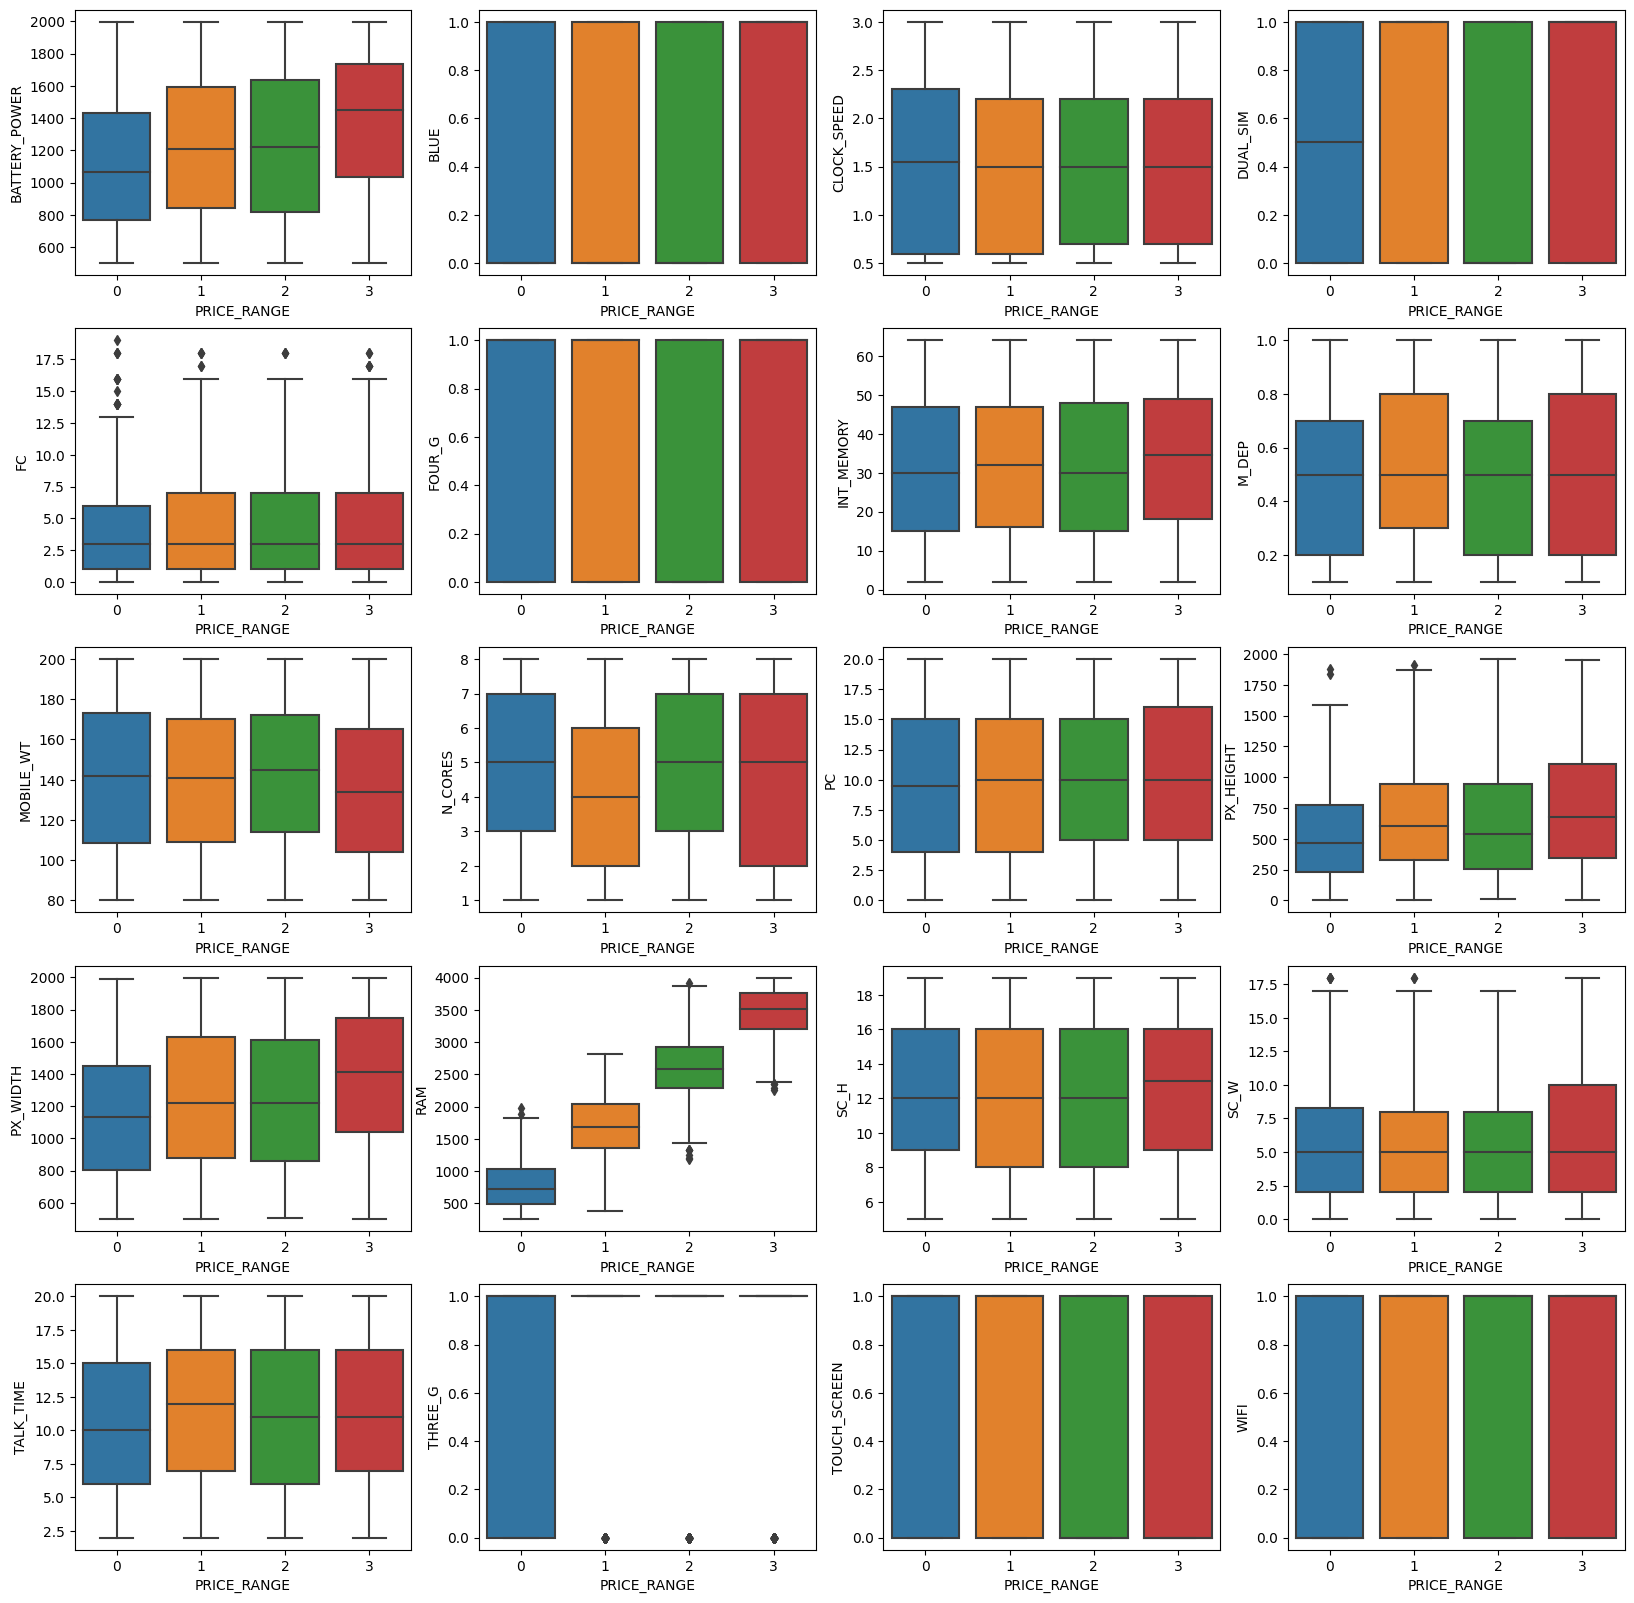

In [ ]:
df_filterd = df_train.drop(columns='PRICE_RANGE')
plt.figure(figsize=(20,20))
i = 1
for col in df_filterd.columns:
    plt.subplot(5,4,i)
    sns.boxplot( x = "PRICE_RANGE", y = col  , data = df_train)
    i +=1


<Axes: >

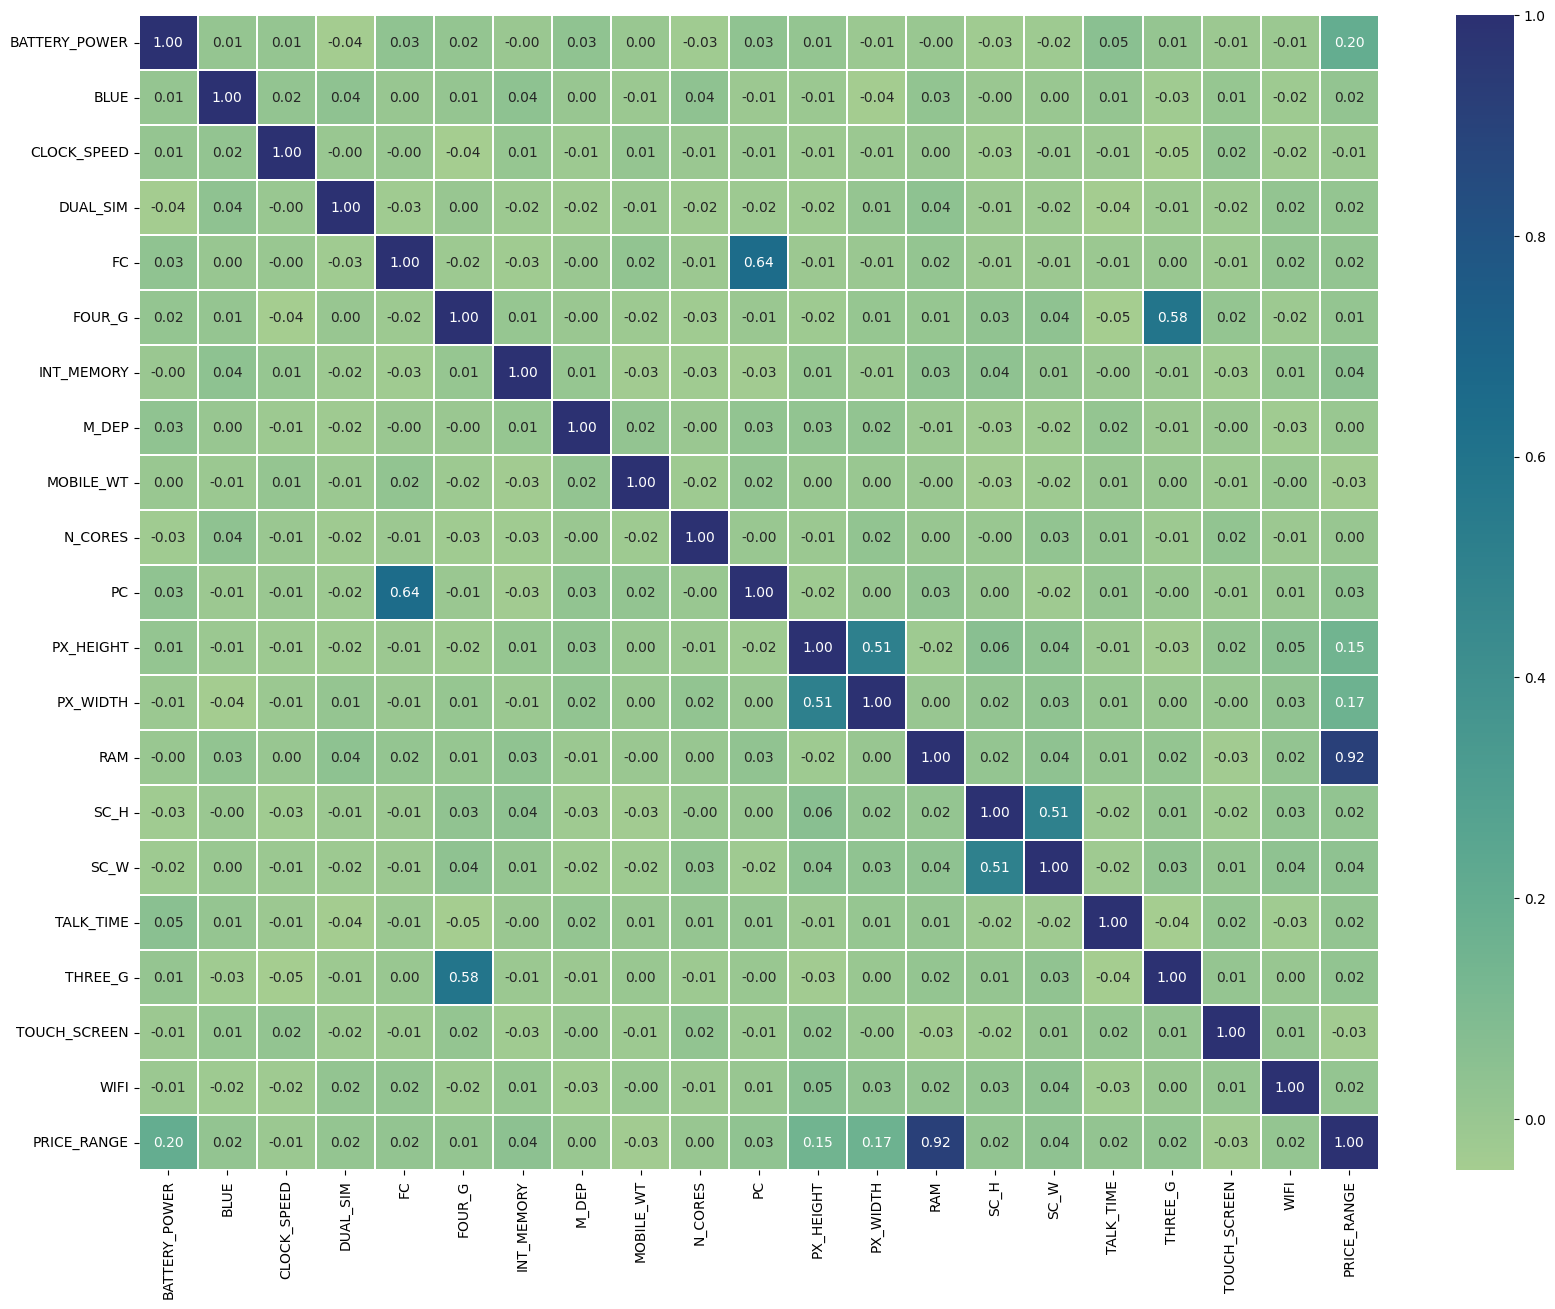

In [ ]:
plt.figure(figsize=(20,15))
sns.heatmap(data= df_train.corr() , fmt ='.2f' , annot=True , linewidth=.05, cmap="crest")

#**Analysis**

Text(0.5, 1.0, 'Mobile_Price_Count')

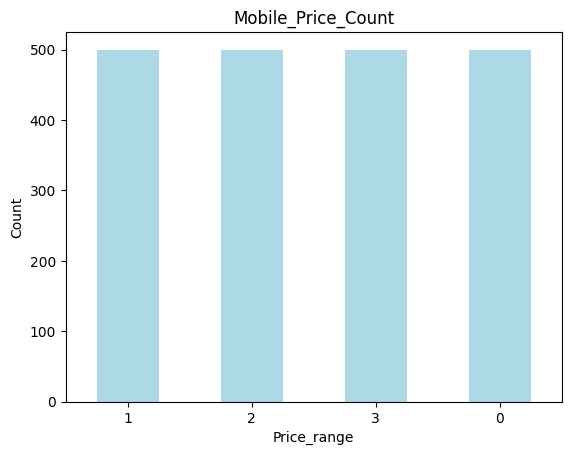

In [ ]:
df_train['PRICE_RANGE'].value_counts().plot(kind = 'bar', color = 'lightblue' , rot=0 )
plt.xlabel("Price_range")
plt.ylabel("Count")
plt.title("Mobile_Price_Count")

Text(0.5, 1.0, 'N_CORES_Count')

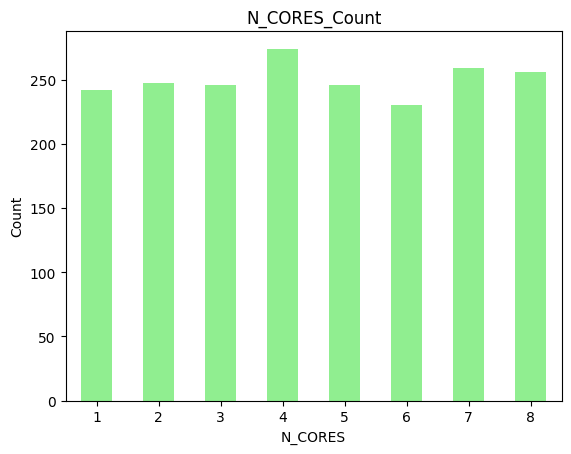

In [ ]:
df_train['N_CORES'].value_counts().sort_index().plot(kind = 'bar', color = 'lightgreen' , rot=0 ,  )
plt.xlabel("N_CORES")
plt.ylabel("Count")
plt.title("N_CORES_Count")

##**0 -1 Value**

In [ ]:
two_values =[]
for col in df_train:
    if df_train[col].nunique() ==2:
        two_values.append(col)
two_values


['BLUE', 'DUAL_SIM', 'FOUR_G', 'THREE_G', 'TOUCH_SCREEN', 'WIFI']

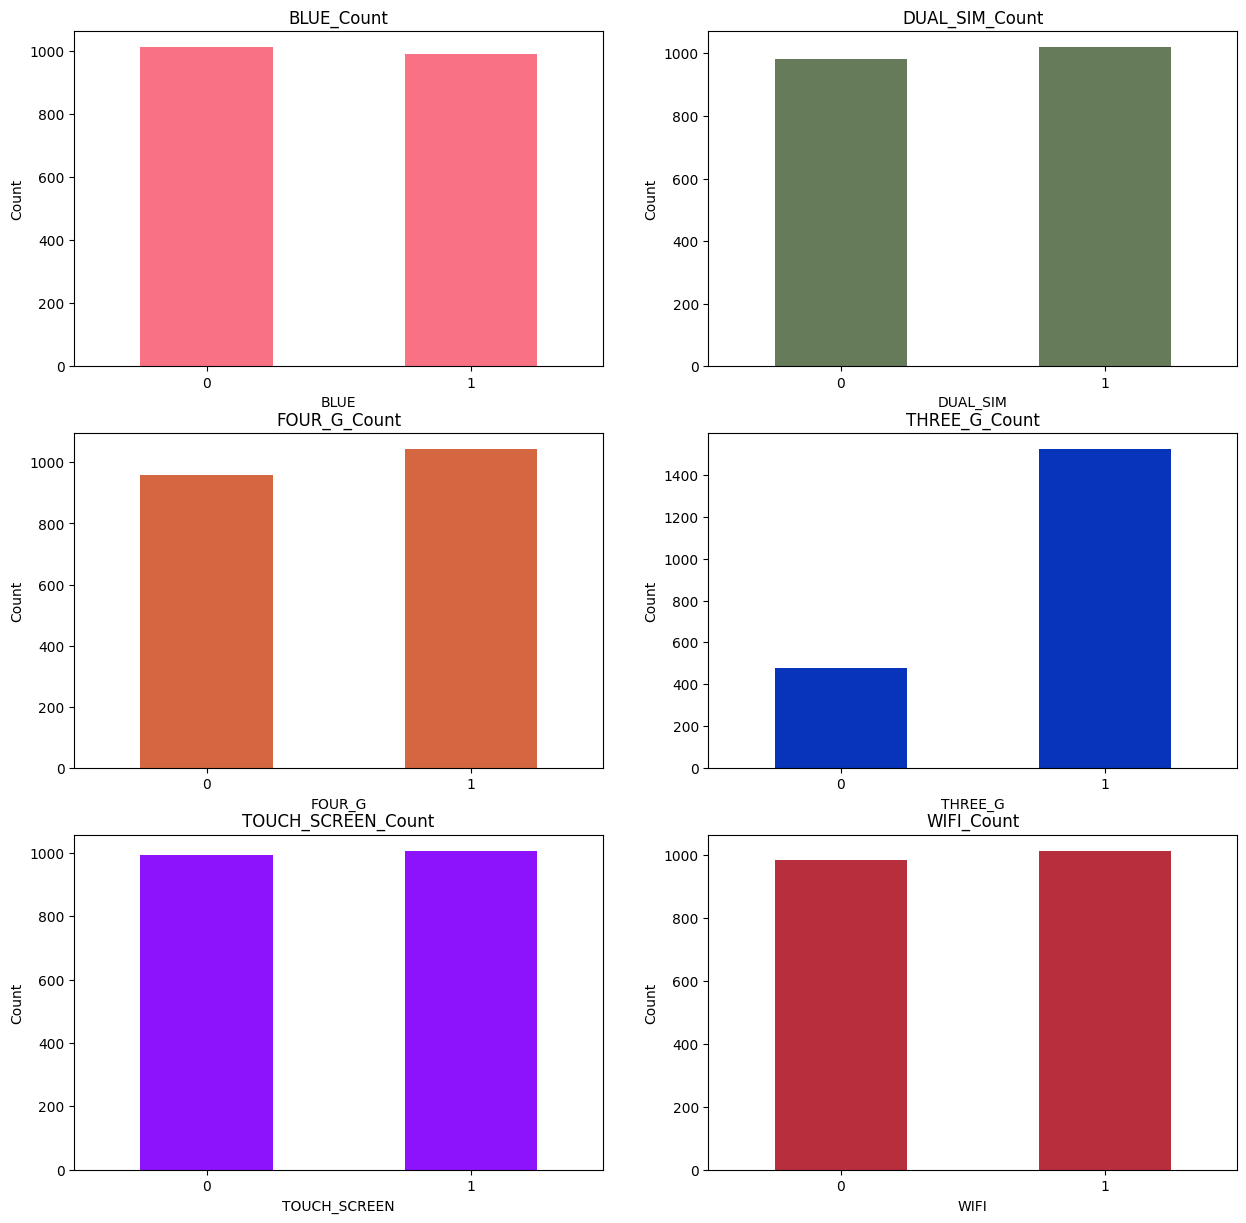

In [ ]:
plt.figure(figsize=(15,20))
i = 1
random_colors = [(random.random(), random.random(), random.random()) for _ in range(len(two_values))]
for col in two_values:

    plt.subplot(4,2,i)
    df_train[col].value_counts().sort_index().plot(kind = 'bar', color = random_colors[i-1], rot=0 )
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.title(col+ "_Count")
    i = i+1

In [ ]:
i = 1
random_colors = [(random.random(), random.random(), random.random()) for _ in range(3)]
print(random_colors)
for z in range(3):
    print(random_colors[i-1])
    i=i+1
    z+=1

[(0.9743359427416882, 0.323607496664169, 0.3555437886787496), (0.40428153679241097, 0.3683000304044364, 0.4916616108032944), (0.1627037498859103, 0.39890602602578684, 0.5358409524744076)]
(0.9743359427416882, 0.323607496664169, 0.3555437886787496)
(0.40428153679241097, 0.3683000304044364, 0.4916616108032944)
(0.1627037498859103, 0.39890602602578684, 0.5358409524744076)


In [ ]:
cols_to_drop = ['PRICE_RANGE', 'N_CORES'] + two_values
con= df_train.drop(columns = cols_to_drop).columns
len(con)

13

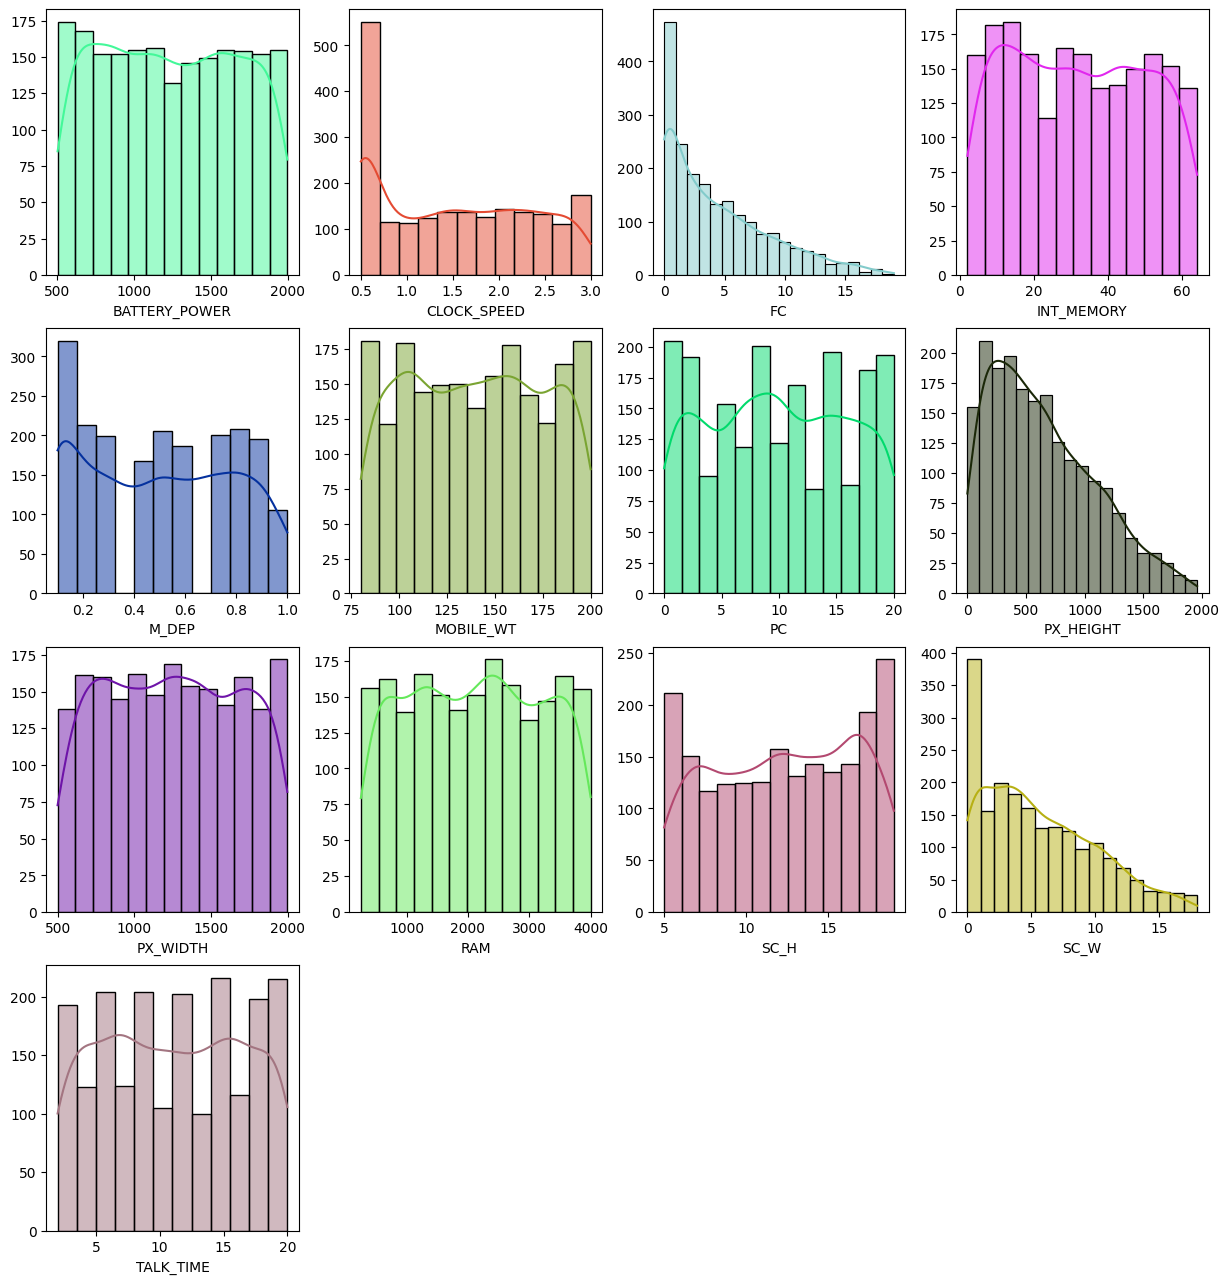

In [ ]:
plt.figure(figsize = (15,20))
i =1
random_colors = [(random.random(), random.random(), random.random()) for _ in range(len(con))]
for column in con:
    plt.subplot(5,4,i)
    sns.histplot(df_train[column], kde=True, label=column , color = random_colors[i-1])
    plt.xlabel(column)
    plt.ylabel('')
    i = i+1

##**Multivariate Analysis**

#**Mobile_Test**

## **Price_Range by Ram**

In [ ]:
price_ram = df_train.groupby('PRICE_RANGE')['RAM'].mean()
df_price_ram = pd.DataFrame(price_ram, index=None ,)


In [ ]:
df_price_ram =df_price_ram.reset_index()

In [ ]:
df_price_ram.columns = ['Price_range' , 'Mean']

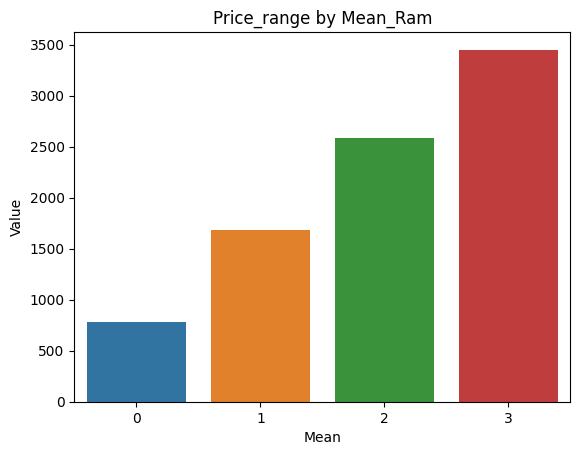

In [ ]:
sns.barplot(df_price_ram , x = 'Price_range' , y = 'Mean')
plt.title("Price_range by Mean_Ram")
plt.xlabel("Mean")
plt.ylabel("Value")
# plt.legend(title="Range" , labels = )
plt.show()

In [ ]:
threeg_range = df_train.groupby('PRICE_RANGE')['THREE_G'].value_counts().unstack()
df_3g_range = pd.DataFrame(threeg_range, index=None ,)

In [ ]:
df_3g_range = df_3g_range.reindex()

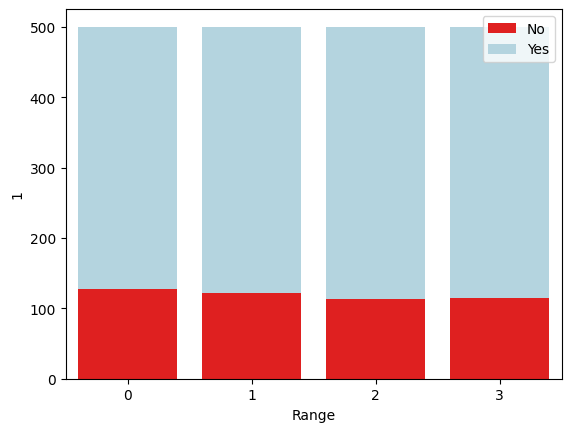

In [ ]:
sns.barplot(df_3g_range , x=df_3g_range.index , y = 0 ,  color = 'red' , label = 'No')
sns.barplot(df_3g_range , x=df_3g_range.index, y = 1 , bottom =df_3g_range[0]  , color = 'lightblue' , label ='Yes')
plt.xlabel('Range')
plt.legend()
plt.show()



In [ ]:
fourg_range = df_train.groupby('PRICE_RANGE')['FOUR_G'].value_counts().unstack()
df_4g_range = pd.DataFrame(fourg_range, index=None ,)

In [ ]:
df_4g_range

FOUR_G,0,1
PRICE_RANGE,,
0,241,259
1,238,262
2,253,247
3,225,275


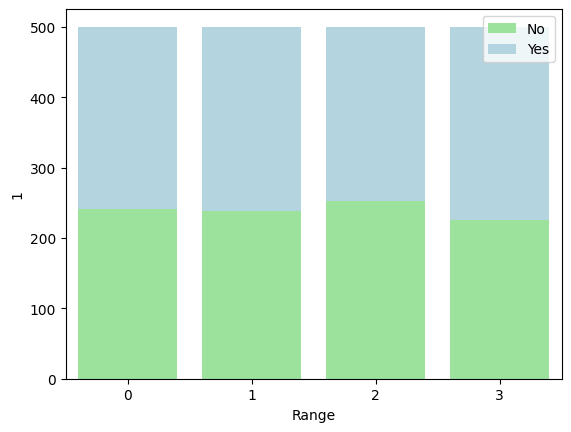

In [ ]:
sns.barplot(df_4g_range , x=df_4g_range.index , y = 0 ,  color = 'lightgreen' , label = 'No')
sns.barplot(df_4g_range , x=df_4g_range.index, y = 1 , bottom =df_4g_range[0]  , color = 'lightblue' , label ='Yes')
plt.xlabel('Range')
plt.legend()
plt.show()

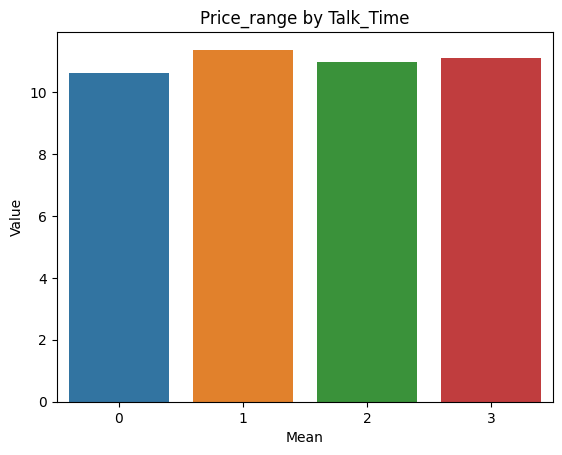

In [ ]:
price_talktime = df_train.groupby('PRICE_RANGE')['TALK_TIME'].mean()
df_price_talktime = pd.DataFrame(price_talktime, index=None ,)
df_price_talktime =df_price_talktime.reset_index()
df_price_talktime.columns = ['Price_range' , 'Mean']
sns.barplot(df_price_talktime , x = 'Price_range' , y = 'Mean')
plt.title("Price_range by Talk_Time")
plt.xlabel("Mean")
plt.ylabel("Value")
# plt.legend(title="Range" , labels = )
plt.show()

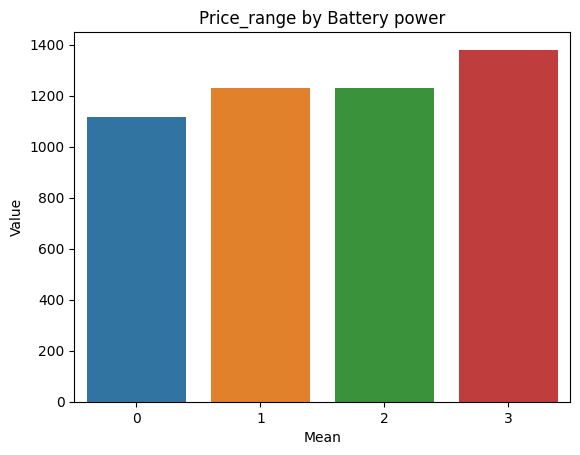

In [ ]:
price_battery = df_train.groupby('PRICE_RANGE')['BATTERY_POWER'].mean()
df_price_battery = pd.DataFrame(price_battery, index=None ,)
df_price_battery =df_price_battery.reset_index()
df_price_battery.columns = ['Price_range' , 'Mean']
sns.barplot(df_price_battery , x = 'Price_range' , y = 'Mean')
plt.title("Price_range by Battery power")
plt.xlabel("Mean")
plt.ylabel("Value")
# plt.legend(title="Range" , labels = )
plt.show()

In [ ]:
# url = 'https://drive.google.com/file/d/1cEpeMjaaz9V0VBI8h0yRH1s8NvGFla8h/view?usp=sharing'
# url ='https://drive.google.com/uc?id=' +url.split('/')[-2]
# df_test = pd.read_csv(url)

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   BATTERY_POWER  2000 non-null   int64  
 1   BLUE           2000 non-null   int64  
 2   CLOCK_SPEED    2000 non-null   float64
 3   DUAL_SIM       2000 non-null   int64  
 4   FC             2000 non-null   int64  
 5   FOUR_G         2000 non-null   int64  
 6   INT_MEMORY     2000 non-null   int64  
 7   M_DEP          2000 non-null   float64
 8   MOBILE_WT      2000 non-null   int64  
 9   N_CORES        2000 non-null   int64  
 10  PC             2000 non-null   int64  
 11  PX_HEIGHT      2000 non-null   int64  
 12  PX_WIDTH       2000 non-null   int64  
 13  RAM            2000 non-null   int64  
 14  SC_H           2000 non-null   int64  
 15  SC_W           2000 non-null   int64  
 16  TALK_TIME      2000 non-null   int64  
 17  THREE_G        2000 non-null   int64  
 18  TOUCH_SC

In [ ]:
# df_test.shape

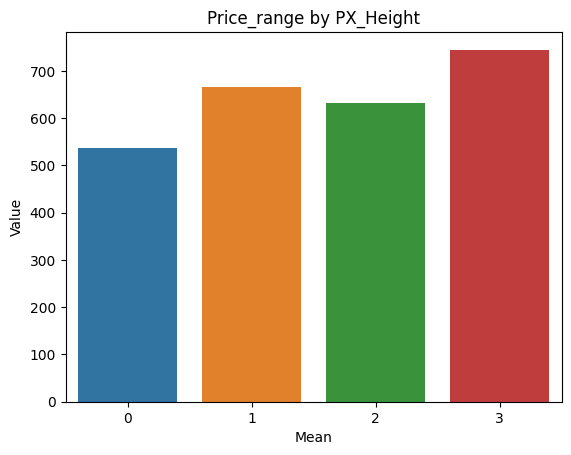

In [ ]:
price_pxh = df_train.groupby('PRICE_RANGE')['PX_HEIGHT'].mean()
df_price_pxh = pd.DataFrame(price_pxh, index=None ,)
df_price_pxh =df_price_pxh.reset_index()
df_price_pxh.columns = ['Price_range' , 'Mean']
sns.barplot(df_price_pxh , x = 'Price_range' , y = 'Mean')
plt.title("Price_range by PX_Height")
plt.xlabel("Mean")
plt.ylabel("Value")
# plt.legend(title="Range" , labels = )
plt.show()

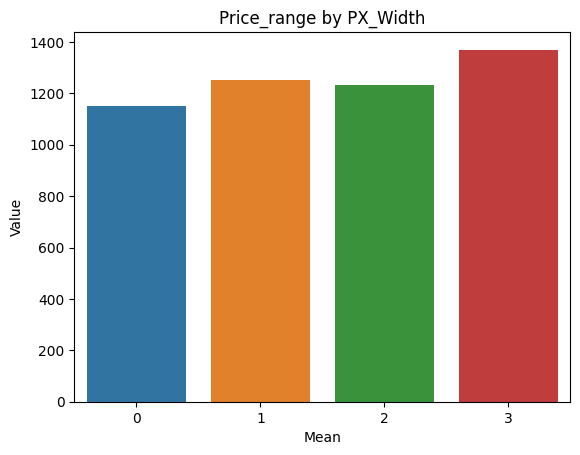

In [ ]:
price_pxw = df_train.groupby('PRICE_RANGE')['PX_WIDTH'].mean()
df_price_pxw = pd.DataFrame(price_pxw, index=None ,)
df_price_pxw =df_price_pxw.reset_index()
df_price_pxw.columns = ['Price_range' , 'Mean']
sns.barplot(df_price_pxw , x = 'Price_range' , y = 'Mean')
plt.title("Price_range by PX_Width")
plt.xlabel("Mean")
plt.ylabel("Value")
# plt.legend(title="Range" , labels = )
plt.show()

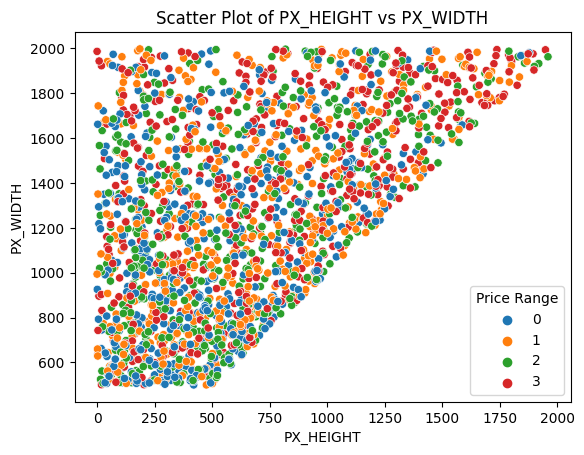

In [ ]:

sns.scatterplot(data=df_train, x='PX_HEIGHT', y='PX_WIDTH', hue='PRICE_RANGE' ,  palette = 'tab10')
plt.title("Scatter Plot of PX_HEIGHT vs PX_WIDTH")
plt.xlabel("PX_HEIGHT")
plt.ylabel("PX_WIDTH")
plt.legend(title="Price Range")
plt.show()

#**Label Enconding**

In [ ]:
from sklearn.preprocessing import LabelEncoder
def LabelEncoding(df):
    le =LabelEncoder()
    for col in df.columns:
        if df[col].dtype ==object:
            le.fit(df[col])
            df[col] =le.transform(df[col])
    return df
df_train = LabelEncoding(df_train)
# df_test = LabelEncoding(df_test)

In [ ]:
df_test

In [ ]:
df_test =df_test.drop(columns = 'ID')

In [ ]:
df_test

In [ ]:
df_train


,BATTERY_POWER,BLUE,CLOCK_SPEED,DUAL_SIM,FC,FOUR_G,INT_MEMORY,M_DEP,MOBILE_WT,N_CORES,PC,PX_HEIGHT,PX_WIDTH,RAM,SC_H,SC_W,TALK_TIME,THREE_G,TOUCH_SCREEN,WIFI,PRICE_RANGE
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1,0


# **SET_X,Y**



In [ ]:
X = df_train.drop(columns="PRICE_RANGE")
y =df_train['PRICE_RANGE']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)


# **NORMARLIZE**

In [ ]:
sc = MinMaxScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

# **RFE**

In [ ]:
estimator = RandomForestClassifier()
rfe = RFE(estimator, n_features_to_select=5)
rfe.fit(X_train, y_train)


In [ ]:
selected_indices = rfe.get_support(indices=True)
selected_features = X.columns[selected_indices]

In [ ]:
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

In [ ]:
X_train_selected

,BATTERY_POWER,CLOCK_SPEED,INT_MEMORY,MOBILE_WT,PC,PX_HEIGHT,PX_WIDTH,RAM,SC_W,TALK_TIME
1649,1307,1.8,7,88,3,897,1103,1412,9,5
1079,1893,0.5,23,179,3,1203,1432,1482,7,17
1983,1262,1.8,34,149,16,223,737,3248,3,4
542,569,0.6,39,184,9,389,739,2811,6,7
916,816,0.5,14,198,13,149,558,1018,10,15
...,...,...,...,...,...,...,...,...,...,...
835,1224,1.6,33,157,18,522,563,3796,5,13
1216,1158,0.7,29,123,20,311,1796,1542,9,15
1653,1190,2.0,40,93,1,1399,1646,3610,7,9
559,1191,2.4,13,169,7,179,1813,1028,6,8


## **RFE + NL**

In [ ]:

estimator = RandomForestClassifier()
rfe = RFE(estimator, n_features_to_select=5)
rfe.fit(X_train, y_train)
selected_indices = rfe.get_support(indices=True)
selected_features = X.columns[selected_indices]
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]
sc = MinMaxScaler()
X_train_scaled = sc.fit_transform(X_train_selected)
X_test_scaled = sc.transform(X_test_selected)

# **MODEL**

## **Decision Tree**

In [ ]:
from sklearn import metrics

In [ ]:
from inspect import modulesbyfile
model_dt = DecisionTreeClassifier(max_depth=3)

model_dt= model_dt.fit(X_train, y_train)

In [ ]:
y_pred_dt  = model_dt.predict (X_test)
print("Accuracy: ", metrics.accuracy_score(y_test,y_pred_dt))


Accuracy:  0.7575


[Text(0.5, 0.875, 'x[13] <= 2235.5\ngini = 0.75\nsamples = 1333\nvalue = [333, 350, 333, 317]'),
 Text(0.25, 0.625, 'x[13] <= 1175.5\ngini = 0.584\nsamples = 712\nvalue = [333, 308, 71, 0]'),
 Text(0.125, 0.375, 'x[11] <= 1449.0\ngini = 0.231\nsamples = 323\nvalue = [280, 43, 0, 0]'),
 Text(0.0625, 0.125, 'gini = 0.177\nsamples = 305\nvalue = [275, 30, 0, 0]'),
 Text(0.1875, 0.125, 'gini = 0.401\nsamples = 18\nvalue = [5, 13, 0, 0]'),
 Text(0.375, 0.375, 'x[0] <= 1484.5\ngini = 0.484\nsamples = 389\nvalue = [53, 265, 71, 0]'),
 Text(0.3125, 0.125, 'gini = 0.424\nsamples = 248\nvalue = [53, 180, 15, 0]'),
 Text(0.4375, 0.125, 'gini = 0.479\nsamples = 141\nvalue = [0, 85, 56, 0]'),
 Text(0.75, 0.625, 'x[13] <= 3140.0\ngini = 0.557\nsamples = 621\nvalue = [0, 42, 262, 317]'),
 Text(0.625, 0.375, 'x[0] <= 1333.0\ngini = 0.48\nsamples = 329\nvalue = [0, 42, 225, 62]'),
 Text(0.5625, 0.125, 'gini = 0.418\nsamples = 185\nvalue = [0, 40, 135, 10]'),
 Text(0.6875, 0.125, 'gini = 0.479\nsamples 

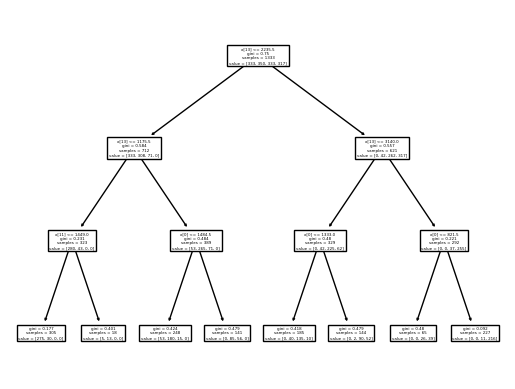

In [ ]:
tree.plot_tree(model_dt)

In [ ]:
from sklearn.tree import export_graphviz
import graphviz

In [ ]:
dot_data = export_graphviz(model_dt, out_file=None, feature_names=X_test.columns, class_names=y.unique().astype(str), filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph.render("decision_tree3")  # Lưu biểu đồ vào file "decision_tree.pdf"
graph.view("decision_tree3")  # Hiển thị biểu đồ

'decision_tree3.pdf'

In [ ]:
y_pred_dt

array([3, 0, 2, 1, 3, 0, 0, 3, 3, 1, 0, 3, 0, 2, 3, 0, 3, 2, 2, 1, 1, 0,
       3, 1, 1, 2, 3, 1, 3, 1, 1, 0, 1, 0, 2, 3, 0, 0, 3, 3, 3, 1, 3, 3,
       1, 3, 0, 1, 2, 1, 0, 3, 0, 2, 0, 2, 3, 1, 0, 3, 3, 1, 3, 2, 2, 2,
       3, 3, 1, 2, 3, 2, 1, 0, 1, 3, 2, 2, 2, 1, 3, 2, 2, 0, 0, 0, 2, 1,
       1, 3, 1, 2, 2, 1, 0, 3, 3, 3, 0, 3, 1, 2, 3, 1, 3, 1, 2, 3, 3, 3,
       3, 0, 0, 2, 2, 3, 1, 1, 1, 0, 1, 3, 1, 2, 1, 2, 1, 1, 0, 2, 1, 3,
       3, 2, 3, 3, 3, 1, 0, 1, 1, 2, 2, 3, 0, 2, 0, 0, 2, 0, 1, 1, 1, 1,
       3, 1, 0, 3, 1, 2, 2, 1, 3, 1, 2, 3, 3, 2, 1, 0, 3, 2, 2, 2, 3, 1,
       1, 2, 3, 0, 3, 1, 1, 1, 3, 1, 2, 0, 2, 3, 1, 1, 0, 2, 3, 0, 1, 3,
       1, 0, 3, 3, 3, 1, 1, 2, 2, 3, 0, 0, 0, 2, 3, 3, 0, 0, 1, 3, 2, 3,
       3, 3, 0, 0, 3, 2, 2, 2, 1, 3, 1, 1, 0, 3, 3, 0, 2, 2, 0, 1, 0, 3,
       3, 2, 0, 0, 1, 3, 3, 1, 3, 0, 3, 1, 1, 0, 1, 3, 2, 2, 0, 0, 1, 3,
       3, 2, 2, 3, 2, 1, 0, 3, 3, 2, 2, 3, 3, 2, 2, 1, 0, 2, 1, 1, 0, 0,
       2, 2, 2, 2, 0, 2, 2, 0, 1, 2, 3, 0, 2, 0, 1,

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_dt, target_names=y.unique().astype(str)))

              precision    recall  f1-score   support

           1       0.95      0.81      0.87        95
           2       0.63      0.79      0.70        92
           3       0.62      0.61      0.62        99
           0       0.87      0.82      0.84       114

    accuracy                           0.76       400
   macro avg       0.77      0.76      0.76       400
weighted avg       0.77      0.76      0.76       400



## **RANDOM FOREST**

In [ ]:
X = df_train.drop(columns="PRICE_RANGE")
y =df_train['PRICE_RANGE']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)


In [ ]:
# model_rf = RandomForestClassifier(n_estimators=100 , random_state = 42 ,  )
model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)

In [ ]:
print("Accuracy: " ,metrics.accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf, target_names=y.unique().astype(str)))

Accuracy:  0.86


In [ ]:
cf_matrix = metrics.confusion_matrix(y_test,y_pred_rf)
cf_matrix

array([[ 93,   2,   0,   0],
       [  6,  75,  11,   0],
       [  0,  12,  78,   9],
       [  0,   0,  10, 104]])

In [ ]:
feature_importances = model_rf.feature_importances_
feature_names = X.columns
sorted_indices = np.argsort(feature_importances)

In [ ]:
feature_importances

array([0.07646001, 0.0073761 , 0.02738437, 0.00690639, 0.02413814,
       0.00613226, 0.03686884, 0.02328056, 0.03798669, 0.02454727,
       0.03056289, 0.05656396, 0.05713006, 0.48489975, 0.02568883,
       0.02800598, 0.02858635, 0.00484904, 0.00638423, 0.0062483 ])

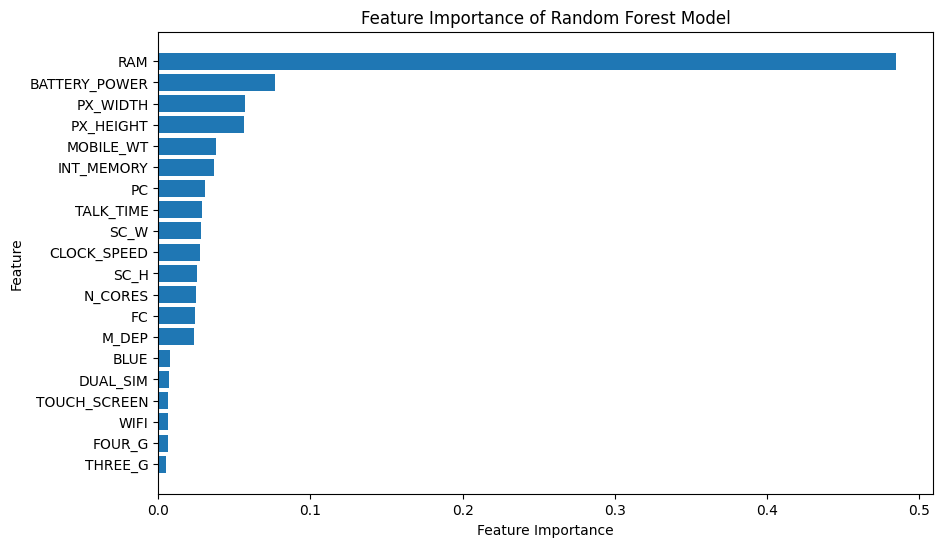

In [ ]:
plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_names)), feature_importances[sorted_indices])
plt.yticks(range(len(feature_names)), [feature_names[i] for i in sorted_indices])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance of Random Forest Model')
plt.show()

In [ ]:
feature_importances

array([0.07839865, 0.00699028, 0.02904191, 0.00729821, 0.0242069 ,
       0.00606614, 0.03792465, 0.02434032, 0.03798014, 0.02341487,
       0.02843685, 0.05682331, 0.05911216, 0.47492631, 0.02721403,
       0.02925679, 0.0298482 , 0.0056105 , 0.00718556, 0.00592425])

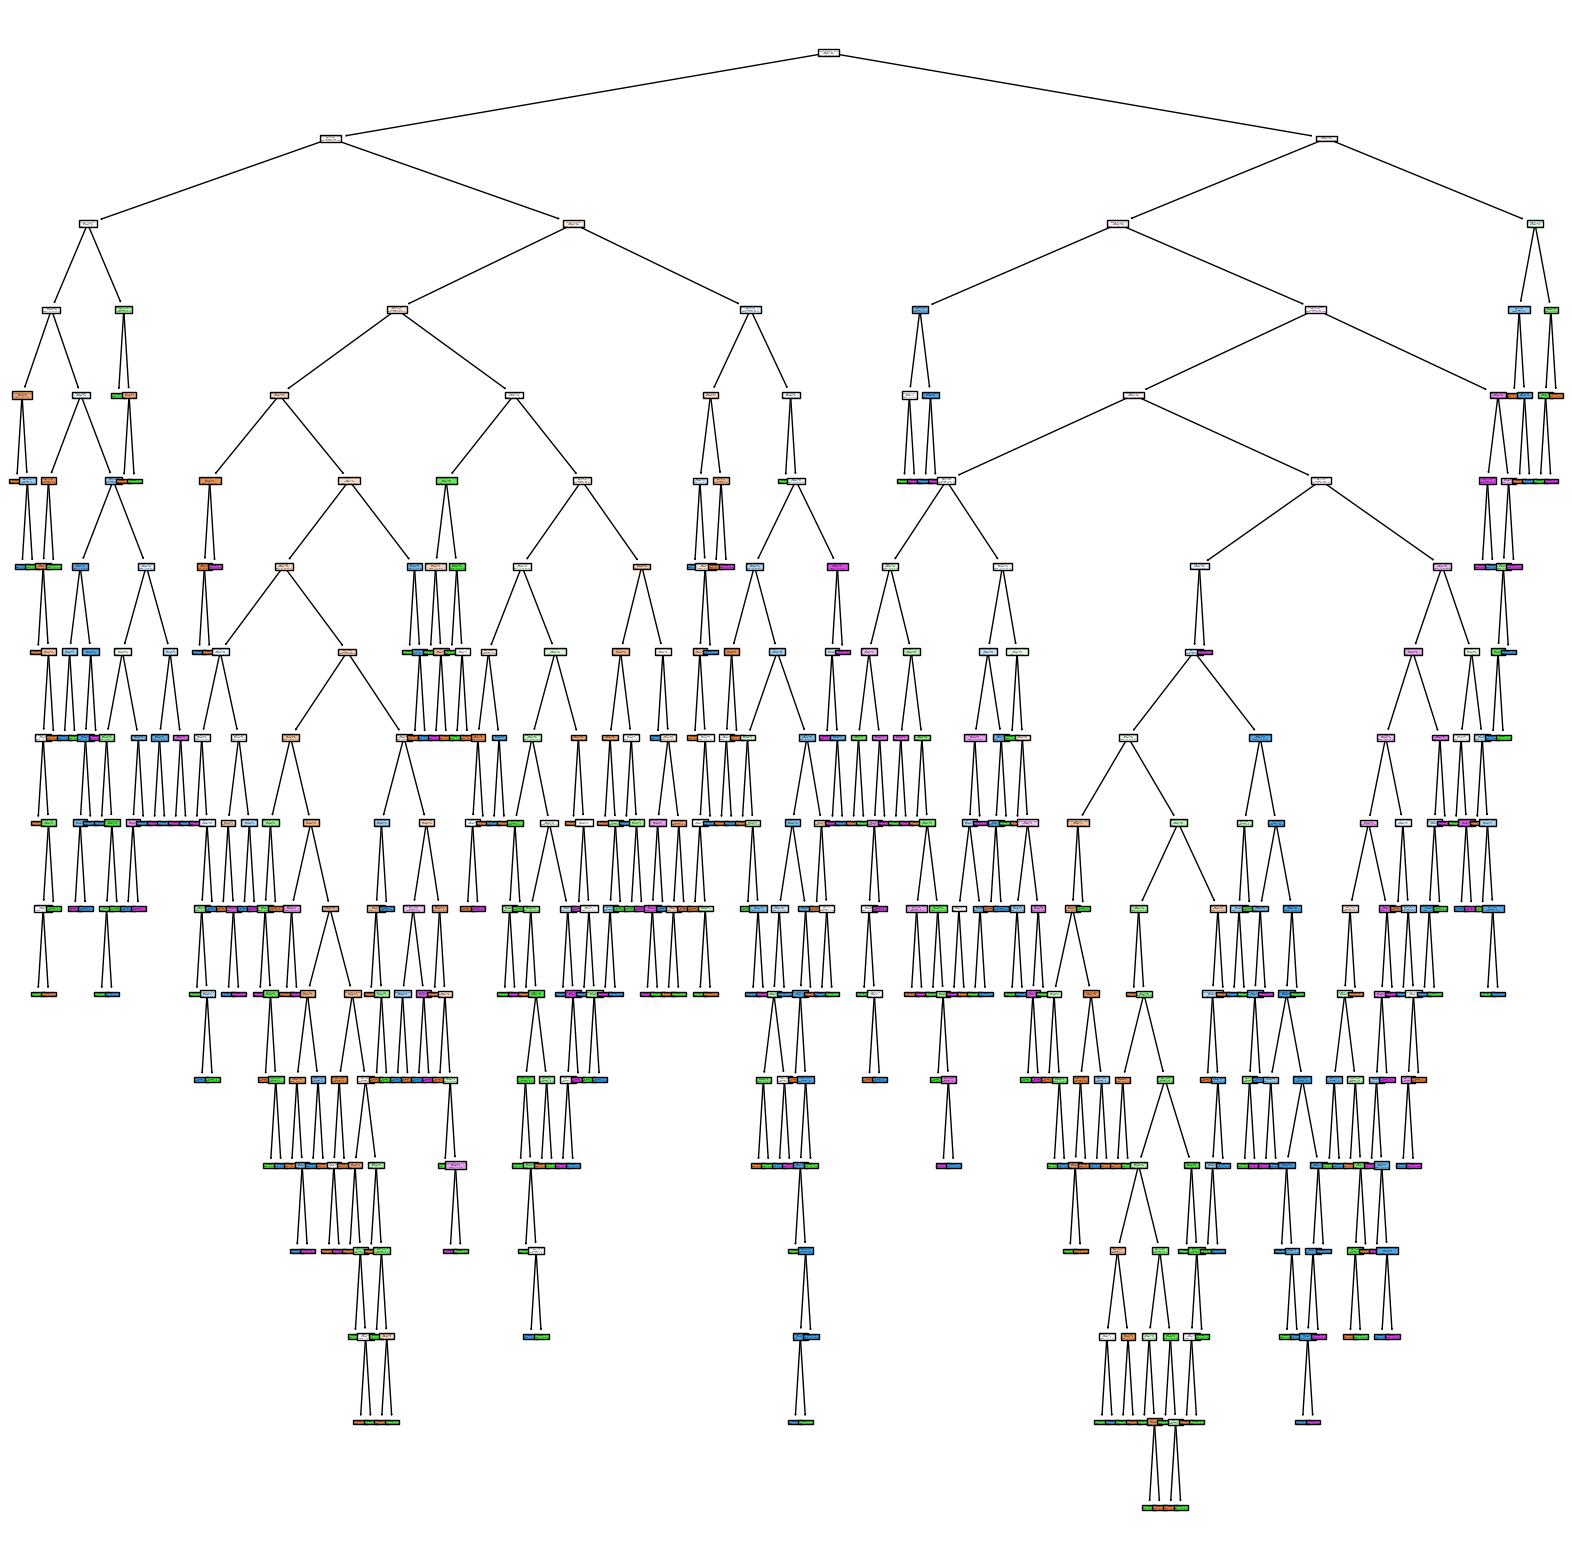

In [ ]:
fig = plt.figure (figsize = (20 , 20) )
plot = tree.plot_tree (model_rf.estimators_[5], feature_names = X.columns, filled = True)
fig.savefig ('Tree2.png')

## **SVM (Support Vector Machine)**

In [ ]:
from sklearn import svm


In [ ]:
X = df_train.drop(columns="PRICE_RANGE")
y =df_train['PRICE_RANGE']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, )


In [ ]:
model_svm = svm.SVC(decision_function_shape='ovr')
model_svm.fit(X_train,y_train)
y_pred_svm = model_svm.predict(X_test)
print("Accuracy : " , metrics.accuracy_score(y_test,y_pred_svm))

Accuracy :  0.955


In [ ]:
print(classification_report(y_test, y_pred_svm, target_names=y.unique().astype(str)))

In [ ]:
dec = model_svm.decision_function(X_test)


In [ ]:
dec

array([[-0.33161724,  1.33022207,  2.31465333,  3.32865549],
       [ 3.32923528,  2.32623654,  1.33250929, -0.33270537],
       [-0.33009192,  2.32950774,  3.33125468,  0.66897097],
       ...,
       [-0.33075416,  1.32973662,  3.33028685,  1.67124211],
       [-0.33148061,  1.33017927,  2.32607273,  3.32234013],
       [ 1.67677719,  3.32890571,  1.33200168, -0.33219425]])

In [ ]:

model_svm_ovo = svm.SVC(decision_function_shape='ovo')
model_svm_ovo.fit(X_train, y_train)


y_pred_ovo = model_svm_ovo.predict(X_test)
accuracy_ovo = metrics.accuracy_score(y_test, y_pred_ovo)
dec_ovo = model_svm_ovo.decision_function(X_test)
print("Accuracy OvO: ", accuracy_ovo)
print("Dec OvO: ", dec_ovo)
print(classification_report(y_test, y_pred_ovo, target_names=y.unique().astype(str)))

Accuracy OvO:  0.955
Dec OvO:  [[-4.78908886 -2.47566617 -1.35947742 -4.06175488 -1.56197004 -1.17149023]
 [ 2.95732914  2.48039267  1.74181752  5.49361085  3.17423438  5.41550541]
 [-3.64050159 -1.31363065 -0.43663875 -1.16617394  0.19864555  2.09964524]
 ...
 [ 3.98341407  2.92109914  1.92778199  6.14513231  3.38822445  5.66668163]
 [-4.49611136 -2.06500962 -1.02008717 -3.04078347 -0.89971427  0.1033199 ]
 [ 0.12210786  1.00061058  1.09505655  3.62043716  2.57022145  4.943297  ]]


In [ ]:
len(dec_ovo)

400

In [ ]:
y_test

In [ ]:
y_pred_ovo

array([0, 2, 1, 3, 1, 1, 2, 0, 3, 1, 0, 0, 2, 3, 2, 2, 3, 3, 1, 0, 0, 1,
       1, 2, 0, 1, 3, 2, 2, 0, 0, 0, 3, 0, 1, 1, 2, 0, 3, 0, 2, 3, 2, 0,
       2, 2, 2, 1, 3, 1, 3, 1, 0, 0, 1, 1, 1, 3, 0, 0, 1, 3, 3, 1, 0, 0,
       3, 3, 1, 2, 2, 2, 0, 1, 2, 0, 0, 3, 2, 2, 3, 2, 1, 0, 1, 3, 1, 3,
       3, 0, 3, 3, 2, 1, 3, 2, 2, 3, 1, 1, 0, 0, 1, 0, 0, 3, 2, 0, 1, 1,
       0, 0, 3, 1, 3, 2, 3, 2, 0, 2, 1, 3, 2, 1, 3, 3, 0, 3, 0, 2, 3, 0,
       2, 2, 0, 3, 1, 0, 0, 2, 2, 1, 2, 2, 0, 0, 0, 1, 1, 2, 3, 1, 1, 0,
       2, 2, 0, 1, 0, 2, 2, 3, 3, 2, 1, 0, 1, 2, 2, 3, 3, 0, 1, 0, 3, 1,
       1, 2, 1, 0, 0, 0, 0, 0, 3, 2, 0, 3, 0, 0, 0, 0, 1, 3, 3, 1, 0, 1,
       1, 1, 1, 2, 2, 3, 3, 3, 1, 2, 0, 0, 0, 2, 1, 1, 3, 1, 0, 2, 1, 1,
       3, 2, 3, 0, 0, 2, 1, 3, 0, 1, 2, 0, 2, 3, 2, 0, 1, 3, 3, 0, 1, 3,
       3, 3, 0, 3, 1, 2, 3, 3, 2, 1, 1, 3, 3, 1, 3, 3, 3, 3, 3, 0, 1, 2,
       2, 2, 3, 0, 2, 3, 2, 2, 2, 1, 0, 1, 0, 3, 3, 1, 3, 1, 0, 3, 1, 2,
       0, 0, 3, 0, 1, 2, 3, 3, 3, 1, 1, 0, 1, 3, 3,

In [ ]:

model_svm_ovr = svm.SVC(decision_function_shape='ovr')
model_svm_ovr.fit(X_train, y_train)

y_pred_ovr = model_svm_ovr.predict(X_test)
accuracy_ovr = metrics.accuracy_score(y_test, y_pred_ovr)

dec_ovr = model_svm_ovr.decision_function(X_test)
print("Accuracy OvR:", accuracy_ovr)
print("Dec OvR: ", dec_ovr)
print(classification_report(y_test, y_pred_ovr, target_names=y.unique().astype(str)))

Accuracy OvR: 0.955
Dec OvR:  [[-0.29869854  0.84835574  2.28097126  3.26788322]
 [ 3.29258124  2.28366006  0.76033914 -0.30391696]
 [-0.28117479  2.24258033  3.27359029  0.7831495 ]
 ...
 [ 3.29943145  2.2824423   0.74243199 -0.30551542]
 [-0.29448876  1.11905562  3.2796488   2.21498236]
 [ 3.22974208  2.28617609  1.08123765 -0.2986421 ]]


In [ ]:
y_pred_ovr

array([0, 2, 1, 3, 1, 1, 2, 0, 3, 1, 0, 0, 2, 3, 2, 2, 3, 3, 1, 0, 0, 1,
       1, 2, 0, 1, 3, 2, 2, 0, 0, 0, 3, 0, 1, 1, 2, 0, 3, 0, 2, 3, 2, 0,
       2, 2, 2, 1, 3, 1, 3, 1, 0, 0, 1, 1, 1, 3, 0, 0, 1, 3, 3, 1, 0, 0,
       3, 3, 1, 2, 2, 2, 0, 1, 2, 0, 0, 3, 2, 2, 3, 2, 1, 0, 1, 3, 1, 3,
       3, 0, 3, 3, 2, 1, 3, 2, 2, 3, 1, 1, 0, 0, 1, 0, 0, 3, 2, 0, 1, 1,
       0, 0, 3, 1, 3, 2, 3, 2, 0, 2, 1, 3, 2, 1, 3, 3, 0, 3, 0, 2, 3, 0,
       2, 2, 0, 3, 1, 0, 0, 2, 2, 1, 2, 2, 0, 0, 0, 1, 1, 2, 3, 1, 1, 0,
       2, 2, 0, 1, 0, 2, 2, 3, 3, 2, 1, 0, 1, 2, 2, 3, 3, 0, 1, 0, 3, 1,
       1, 2, 1, 0, 0, 0, 0, 0, 3, 2, 0, 3, 0, 0, 0, 0, 1, 3, 3, 1, 0, 1,
       1, 1, 1, 2, 2, 3, 3, 3, 1, 2, 0, 0, 0, 2, 1, 1, 3, 1, 0, 2, 1, 1,
       3, 2, 3, 0, 0, 2, 1, 3, 0, 1, 2, 0, 2, 3, 2, 0, 1, 3, 3, 0, 1, 3,
       3, 3, 0, 3, 1, 2, 3, 3, 2, 1, 1, 3, 3, 1, 3, 3, 3, 3, 3, 0, 1, 2,
       2, 2, 3, 0, 2, 3, 2, 2, 2, 1, 0, 1, 0, 3, 3, 1, 3, 1, 0, 3, 1, 2,
       0, 0, 3, 0, 1, 2, 3, 3, 3, 1, 1, 0, 1, 3, 3,

## **KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
X = df_train.drop(columns="PRICE_RANGE")
y =df_train['PRICE_RANGE']

In [ ]:
X_train , X_test, y_train , y_test = train_test_split(X,y , train_size = 0.8)

In [ ]:
model_knn = KNeighborsClassifier( n_neighbors=3)
model_knn.fit(X_train, y_train)
y_pred_knn = model_knn.predict(X_test)
print("Accuracy: ", metrics.accuracy_score(y_test,y_pred_knn))

Accuracy:  0.9375


In [ ]:
print(classification_report(y_test, y_pred_knn, target_names=y.unique().astype(str)))

              precision    recall  f1-score   support

           1       0.91      0.94      0.93       113
           2       0.88      0.85      0.87       108
           3       0.91      0.90      0.90        86
           0       0.96      0.98      0.97        93

    accuracy                           0.92       400
   macro avg       0.92      0.92      0.92       400
weighted avg       0.91      0.92      0.91       400



## **XGBOOST**

In [ ]:
from xgboost import XGBClassifier

In [ ]:
X = df_train.drop(columns="PRICE_RANGE")
y =df_train['PRICE_RANGE']
X_train , X_test, y_train , y_test = train_test_split(X,y , train_size = 0.8)

In [ ]:
model_xgb = XGBClassifier()
model_xgb.fit(X_train, y_train)
y_pred_xgb = model_xgb.predict(X_test)


In [ ]:
print("Accuracy: " ,metrics.accuracy_score(y_test, y_pred_xgb))

Accuracy:  0.915


In [ ]:
print(classification_report(y_test, y_pred_xgb, target_names=y.unique().astype(str)))

              precision    recall  f1-score   support

           1       0.95      0.96      0.96       101
           2       0.91      0.85      0.88       106
           3       0.81      0.89      0.85        93
           0       0.95      0.91      0.93       100

    accuracy                           0.90       400
   macro avg       0.90      0.90      0.90       400
weighted avg       0.91      0.90      0.90       400



In [ ]:
# from sklearn.metrics import roc_auc_score
# auc = roc_auc_score(y_test, y_pred_xgb , multi_class='ovr')
# print("AOC: ", auc ,)


AxisError: ignored